In [1]:
from os import listdir
from os.path import isfile, join
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
import codecs

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [2]:
data = np.transpose(np.loadtxt('cross.txt',skiprows=30))

In [3]:
crossData = data[0]
enData = data[6]*1000
angData = data[8]

In [4]:
data = np.transpose(np.loadtxt('rates.txt', skiprows=1))
counts = data[0]
solid = data[1]
energy = data[3]
times = data[4]/1000 #divider med 1000 for at få tid i s
currents = data[5]/times
angles = data[6]

In [5]:
uniqueAngles = set(angles)
uniqueAngles = list(uniqueAngles)

In [6]:
uniqueAngles

[100.0, 105.0, 140.0, 110.0, 145.0, 115.0, 150.0, 120.0, 155.0, 125.0]

In [7]:
crosses = []
ens = []

for i in range(len(uniqueAngles)):
    currentCross = []
    currentEn = []
    for j in range(len(crossData)):
        if int(angData[j]) == int(uniqueAngles[i]):
            currentCross.append(crossData[j])
            currentEn.append(enData[j])
    crosses.append(currentCross)
    ens.append(currentEn)

In [8]:
c = 2.99792e8 # i m/s
hbar = 6.5821e-19 # i keV*s
a = 1/137.036
hbarc = 1.97327e-10

def cross(Ta,v):
    return (1*13*a*hbarc/(4*Ta*np.sin(v*(2*np.pi)/360/2)**2))**2*1e28

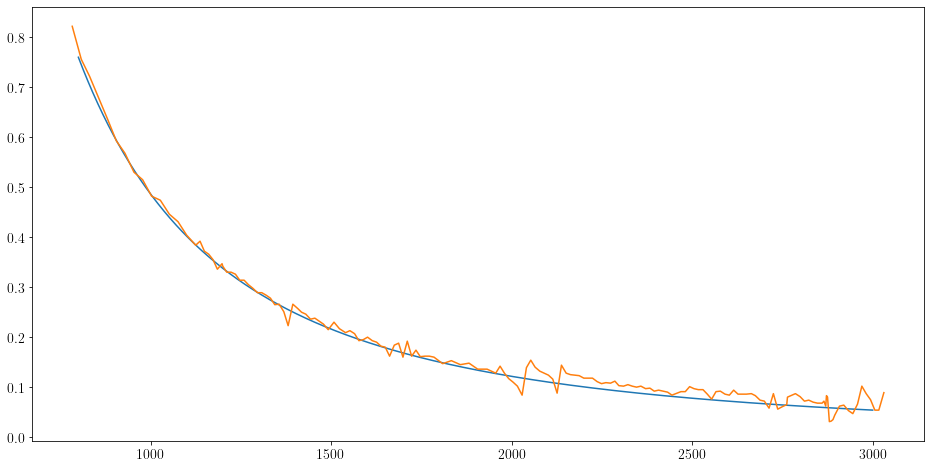

In [9]:
Ts = np.linspace(800,3000,2000)
plt.figure(figsize = (16,8))
plt.plot(Ts,cross(Ts,110))
plt.plot(ens[3],crosses[3])

In [10]:
uniqueAngles

[100.0, 105.0, 140.0, 110.0, 145.0, 115.0, 150.0, 120.0, 155.0, 125.0]

In [11]:
times

array([701.12 , 701.12 , 701.12 , 701.12 , 701.12 , 701.12 , 701.12 ,
       701.12 , 701.12 , 701.12 , 239.529, 239.529, 239.529, 239.529,
       239.529, 239.529, 239.529, 239.529, 239.529, 239.529, 186.257,
       186.257, 186.257, 186.257, 186.257, 186.257, 186.257, 186.257,
       186.257, 186.257])

In [12]:
#for #1 blev der angiveligt kørt ved ca. 0,5 nA, svarer til ca 3.12e9 protoner per sekund. Det ville derfor give
#mening hvis currents skal ganges med 10^8

#i stedet er der lavet en kalibrering: 106.7 counts svarer til en nC. Dvs 1 count svarer til 1/106.7 nC. Svarer til 
#5.85e7 elementary charges

In [13]:
currents = currents*5.85e7

In [26]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

dnts = []
dntsAtAngle = []
dntsAtEnergy = []

for i in range(len(counts)):
    if(counts[i] > 0):
        indexAngle = find_nearest(uniqueAngles,angles[i])
        indexWhereEnergy = find_nearest(ens[indexAngle], energy[i])
        crossAtEn = crosses[indexAngle][indexWhereEnergy]*1e-24
        dnt = counts[i]/times[i] * 1/currents[i]*1/(crossAtEn*solid[i]) #cross(energy[i],110)
        dntsAtAngle.append(angles[i])
        dntsAtEnergy.append(energy[i])
        dnts.append(dnt)
dnts = np.array(dnts)
mold = dnts/6.022e23 #mol pr cm²
gd = 27*mold #g pr cm²

In [27]:
gd

array([4.70273896e-05, 4.13700417e-05, 3.92945043e-05, 3.19607060e-05,
       3.57262096e-05, 4.67922883e-05, 3.26365065e-05, 3.99000396e-05,
       3.51413320e-05, 3.54536633e-05, 3.27542335e-05, 3.78063059e-05,
       7.38199437e-05, 5.77894483e-05, 5.38523320e-05, 5.14611090e-05,
       4.88091422e-05, 4.17947236e-05, 4.36782233e-05, 7.57993430e-05,
       5.58531262e-05])

In [28]:
#for at få tykkelse, divider med densiteten af alu

In [39]:
thicknesses = gd/(2.7)/100*1e9
thicknesses

array([ 64.50945075,  56.74902835,  53.90192634,  43.84184631,
        49.00714623,  64.18695246,  44.7688704 ,  54.73256458,
        48.20484498,  48.633283  ,  44.93036143,  51.86050197,
       101.26192548,  79.2722199 ,  73.87151165,  70.59137037,
        66.95355587,  57.33158245,  59.91525833, 103.97715094,
        76.61608537])

In [47]:
np.mean(gd/(2.7)/100*1e9)

169.0865276357823

In [48]:
np.std(gd/(2.7)/100*1e9)

44.82641851241935

In [32]:
coordinates = []

for i in range(len(thicknesses)):
    coordinate = 0
    coordinate += dntsAtAngle[i]
    coordinate += (dntsAtEnergy[i]-2000)/5
    coordinates.append(coordinate)

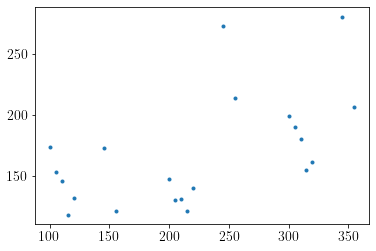

In [33]:
plt.plot(coordinates,thicknesses, '.')